# This notebook is to examine three dataset from the literature and compile a hybrid dataset

In [ ]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install arabic_reshaper

In [ ]:
!pip install python-bidi

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

# ArCOV19 Dataset

In [ ]:
# Importing the dataset
ArCOV19_dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/ArCOV19-Rumors/ArCOV19-Rumors-Dataset.csv')

In [ ]:
print("Number of data points: ", len(ArCOV19_dataset))
ArCOV19_dataset.head(10)

Number of data points:  3584


,tweetID,label,tweetText
0,1.241080e+18,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
1,1.241090e+18,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
2,1.241120e+18,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
3,1.221790e+18,False,فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات و...
4,1.237780e+18,False,تحدث عن الصين والخفافيش.. فيلم «كونتيجن» تنبأ ...
5,1.222230e+18,False,هذا الفيلم تنبأ بفيروس كورونا الجديد: والنهاية...
6,1.244310e+18,False,فيلم «عدوى ــ Contagion»، انتج عام 2011، وتنبأ...
7,1.237020e+18,False,فيلم امريكي يتنبأ بمرض #كورنا من عشر سنوات بال...
8,1.225920e+18,False,فيلم #Contagion إنتاج 2011\nفيلم يتنبأ بفيروس ...
9,1.226600e+18,False,"فيلم ""العدوى"" #Contagion عرض سنة 2011 هذا الف..."


In [ ]:
ArCOV19_dataset=ArCOV19_dataset.drop(labels='tweetID', axis=1)
ArCOV19_dataset["label"].replace({True: "True", False: "False"}, inplace=True)
print("Number of data points: ", len(ArCOV19_dataset))
ArCOV19_dataset.head(10)

Number of data points:  3584


,label,tweetText
0,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
1,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
2,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
3,False,فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات و...
4,False,تحدث عن الصين والخفافيش.. فيلم «كونتيجن» تنبأ ...
5,False,هذا الفيلم تنبأ بفيروس كورونا الجديد: والنهاية...
6,False,فيلم «عدوى ــ Contagion»، انتج عام 2011، وتنبأ...
7,False,فيلم امريكي يتنبأ بمرض #كورنا من عشر سنوات بال...
8,False,فيلم #Contagion إنتاج 2011\nفيلم يتنبأ بفيروس ...
9,False,"فيلم ""العدوى"" #Contagion عرض سنة 2011 هذا الف..."


In [ ]:
def preprocess_tweet(tweet):

  temp = tweet.strip()
  #temp = re.sub(r'http(\S)+', ' ', temp)
  #temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp= temp.strip()
  temp= temp.rstrip('\.')
  return temp


'''def preprocess_tweet(tweet):

  temp = tweet.strip()
  temp = re.sub(r'http(\S)+', ' ', temp)
  temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp = re.sub(r'[\'\"\#)]', '',temp)
  temp = re.sub(r'[\#\-\_]', ' ', temp)
  temp = re.sub(r'[\»\«]', '', temp)
  temp= temp.strip()
  temp= temp.rstrip('\.')
  return temp
  '''

'def preprocess_tweet(tweet):\n\n  temp = tweet.strip()\n  temp = re.sub(r\'http(\\S)+\', \' \', temp)\n  temp = re.sub(r\'www(\\S)+\', \' \', temp)\n  temp = temp.replace(\'\n\', \' \')\n  temp = re.sub(r\'[\'"\\#)]\', \'\',temp)\n  temp = re.sub(r\'[\\#\\-\\_]\', \' \', temp)\n  temp = re.sub(r\'[\\»\\«]\', \'\', temp)\n  temp= temp.strip()\n  temp= temp.rstrip(\'\\.\')\n  return temp\n  '

In [ ]:
for i in  range(10):
  print(ArCOV19_dataset["tweetText"][i])
  print(preprocess_tweet(str(ArCOV19_dataset["tweetText"][i])))
  print("")

قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011. https://t.co/r3frLwvG0K
قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011. https://t.co/r3frLwvG0K

قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011. https://t.co/JFlaHCeuyV
قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011. https://t.co/JFlaHCeuyV

قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011 https://t.co/UOMNGdsUvf
قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011 https://t.co/UOMNGdsUvf

فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات والدليل «كون

In [ ]:
ArCOV19_dataset['tweetText'] = ArCOV19_dataset['tweetText'].map(lambda x: preprocess_tweet(str(x)))

In [ ]:
ArCOV19_dataset_unique=ArCOV19_dataset.drop_duplicates(subset=['tweetText'])
ArCOV19_dataset_unique.reset_index(inplace = True)
ArCOV19_dataset_unique=ArCOV19_dataset_unique.drop(labels='index', axis=1)
print("Number of data points: ", len(ArCOV19_dataset_unique))

Number of data points:  3456


In [ ]:
ArCOV19_dataset_unique.head(20)

,label,tweetText
0,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
1,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
2,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
3,False,فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات و...
4,False,تحدث عن الصين والخفافيش.. فيلم «كونتيجن» تنبأ ...
5,False,هذا الفيلم تنبأ بفيروس كورونا الجديد: والنهاية...
6,False,فيلم «عدوى ــ Contagion»، انتج عام 2011، وتنبأ...
7,False,فيلم امريكي يتنبأ بمرض #كورنا من عشر سنوات بال...
8,False,فيلم #Contagion إنتاج 2011 فيلم يتنبأ بفيروس #...
9,False,"فيلم ""العدوى"" #Contagion عرض سنة 2011 هذا الف..."


In [ ]:
for i in range(20):
  print(ArCOV19_dataset_unique["tweetText"][i])
  print("")

قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال الفنية بظهور أوبئة مشابهة ووضع مصير العالم في خطر، أشهرها فيلم  "Contagion" عام 2011

فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات والدليل «كونتيجن»

تحدث عن الصين والخفافيش.. فيلم «كونتيجن» تنبأ بـ«#كورونا» قبل 9 سنوات (فيديو)

هذا الفيلم تنبأ بفيروس كورونا الجديد: والنهاية لم تكن سعيدة  أشار عشاق فيلم Contagion أو العدوى، الذي صدر عام 2011، إلى التشابه بين الفيلم وفيروس كورونا الجديد. وفي تعليقاتهم على تويتر، كتبوا: كل شيء يبدو متشابها بشكل مرعب، الخفافيش كانت المصدر. الفيلم يحدث في العالم الحقيقي الآن

فيلم «عدوى ــ Contagion»، انتج عام 2011، وتنبأ بانتشار فيروس #Covid_19 يحكى الفيلم ما يحدث فى العالم بسبب فيروس #كورونا Contagion يوثق انتشار مرض معدٍ ومميت ينتقل عبر الخفافيش والخنازير ويهدد البشرية ويحتاج العالم، بعد انتشاره بالصين أيضا.👇   #فيروس_كورونا

فيلم امريكي يتنبأ بمرض #كورنا من عشر سنوات بالاضافه للبلد #الصين_كورونا ومصدر المرض الخفافيش.. هي هذه صدفه ام حرب مدبره

فيلم #Contagion إنتاج 2011 فيلم يتنبأ بفيروس #كورونا  نفس الأعر

In [ ]:
ArCOV19_dataset_unique.head(20)

,label,tweetText
0,False,قبل ظهور وباء #فيروس_كورونا، تنبأت بعض الأعمال...
1,False,فيديو| #أمريكا تتنبأ بـ«#كورونا» منذ 9 سنوات و...
2,False,تحدث عن الصين والخفافيش.. فيلم «كونتيجن» تنبأ ...
3,False,هذا الفيلم تنبأ بفيروس كورونا الجديد: والنهاية...
4,False,فيلم «عدوى ــ Contagion»، انتج عام 2011، وتنبأ...
5,False,فيلم امريكي يتنبأ بمرض #كورنا من عشر سنوات بال...
6,False,فيلم #Contagion إنتاج 2011\nفيلم يتنبأ بفيروس ...
7,False,"فيلم ""العدوى"" #Contagion عرض سنة 2011 هذا الف..."
8,True,الفيديو المتداول بعنوان «الصين بدأت بقتل المصا...
9,True,الفيديو المتداول بعنوان «الصين بدأت بقتل المصا...


Text(0.5, 1.0, 'Class Distribution')

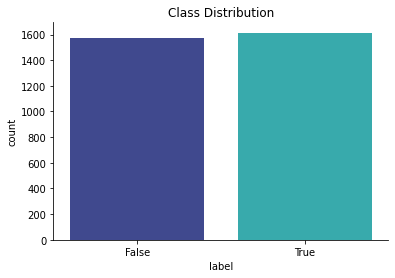

In [ ]:
sns.countplot(x='label', data = ArCOV19_dataset_unique, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
ArCOV19_dataset_unique['label'].value_counts()

True     1614
False    1572
Name: label, dtype: int64

In [ ]:
ArCOV19_dataset_unique.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/ArCOV19-unique1.csv')

# NLP4IF-COVID-AR

In [ ]:
# Importing the dataset
NLP4IF_dataset_train = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/NLP4IF-COVID-AR/covid19_disinfo_binary_arabic_train.tsv', sep='\t', header=0)

In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_train))
NLP4IF_dataset_train = NLP4IF_dataset_train.rename({'text': 'tweet_text'}, axis=1)  # new method
NLP4IF_dataset_train.head(5)

Number of data points:  2536


,tweet_no,tweet_text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,1,#عاجل #خادم_الحرمين_الشريفين يصدر أمره بمنع ال...,yes,no,yes,no,no,no,no
1,2,بعد كل الإجراءات الاحترازية التي تقوم بها #الم...,no,NaN,NaN,NaN,NaN,no,no
2,3,تصويت 🔴 . . هل تعتقد أن ( حظر التجول ) الذي ت...,no,NaN,NaN,NaN,NaN,no,no
3,4,ما هو دي دعواتنا,no,NaN,NaN,NaN,NaN,no,no
4,5,#الصحة تعلن عن تسجيل (١١٩) حالة إصابة جديدة بف...,yes,no,yes,no,no,no,no


In [ ]:
# Importing the dataset
NLP4IF_dataset_dev = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/NLP4IF-COVID-AR/covid19_disinfo_binary_arabic_dev.tsv', sep='\t', header=0)

In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_dev))
NLP4IF_dataset_dev.head(5)

Number of data points:  520


,tweet_no,tweet_text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,199,مصر قفلت المطارات أمس، السفير الفرنسي عمل كلمة...,yes,no,yes,yes,yes,yes,no
1,200,عاجل.. وزارة الصحة: تسجيل ٢٠٥ حالات جديدة بف...,yes,no,yes,no,no,no,no
2,201,مقطع محزن وكارثي لما آلت إليه الأمور هناك كم ه...,no,NaN,NaN,NaN,NaN,no,no
3,202,وزارة الدفاع ممثلة بالإدارة العامة للخدمات الط...,yes,no,yes,no,yes,no,no
4,203,على أرض أغلى وطن سنمضي بكل ثبات لمواجهة المرح...,no,NaN,NaN,NaN,NaN,no,no


In [ ]:
NLP4IF_dataset_all_list=[NLP4IF_dataset_train, NLP4IF_dataset_dev]
#NLP4IF_dataset_all = pd.concat(NLP4IF_dataset_all_list, keys=["t", "d"])
NLP4IF_dataset_all = pd.concat(NLP4IF_dataset_all_list)
NLP4IF_dataset_all.head(5)

,tweet_no,tweet_text,q1_label,q2_label,q3_label,q4_label,q5_label,q6_label,q7_label
0,1,#عاجل #خادم_الحرمين_الشريفين يصدر أمره بمنع ال...,yes,no,yes,no,no,no,no
1,2,بعد كل الإجراءات الاحترازية التي تقوم بها #الم...,no,NaN,NaN,NaN,NaN,no,no
2,3,تصويت 🔴 . . هل تعتقد أن ( حظر التجول ) الذي ت...,no,NaN,NaN,NaN,NaN,no,no
3,4,ما هو دي دعواتنا,no,NaN,NaN,NaN,NaN,no,no
4,5,#الصحة تعلن عن تسجيل (١١٩) حالة إصابة جديدة بف...,yes,no,yes,no,no,no,no


In [ ]:
print("Number of data points: ", len(NLP4IF_dataset_all))
NLP4IF_dataset_all=NLP4IF_dataset_all.drop(labels=['tweet_no', 'q1_label','q3_label','q4_label','q5_label','q6_label','q7_label'], axis=1)
NLP4IF_dataset_all = NLP4IF_dataset_all.rename({'q2_label': 'label'}, axis=1)  # new method
NLP4IF_dataset_all.head(5)

Number of data points:  3056


,tweet_text,label
0,#عاجل #خادم_الحرمين_الشريفين يصدر أمره بمنع ال...,no
1,بعد كل الإجراءات الاحترازية التي تقوم بها #الم...,NaN
2,تصويت 🔴 . . هل تعتقد أن ( حظر التجول ) الذي ت...,NaN
3,ما هو دي دعواتنا,NaN
4,#الصحة تعلن عن تسجيل (١١٩) حالة إصابة جديدة بف...,no


In [ ]:
NLP4IF_dataset_all["label"].replace({"no": "True", "yes": "False"}, inplace=True)
NLP4IF_dataset_all.head(5)

,tweet_text,label
0,#عاجل #خادم_الحرمين_الشريفين يصدر أمره بمنع ال...,True
1,بعد كل الإجراءات الاحترازية التي تقوم بها #الم...,NaN
2,تصويت 🔴 . . هل تعتقد أن ( حظر التجول ) الذي ت...,NaN
3,ما هو دي دعواتنا,NaN
4,#الصحة تعلن عن تسجيل (١١٩) حالة إصابة جديدة بف...,True


In [ ]:
NLP4IF_dataset_all = NLP4IF_dataset_all[NLP4IF_dataset_all['label'].notna()]
print("Number of data points: ", len(NLP4IF_dataset_all))
NLP4IF_dataset_all.head(5)

Number of data points:  2143


,tweet_text,label
0,#عاجل #خادم_الحرمين_الشريفين يصدر أمره بمنع ال...,True
4,#الصحة تعلن عن تسجيل (١١٩) حالة إصابة جديدة بف...,True
6,#الصحة تعلن عن تسجيل (٢٠٥) حالة إصابة جديدة بف...,True
9,صحيفة newsweek الأمريكية:هل تعرف من الذي اقترح...,True
10,58 من ال70 حالة المعلنة قبل قليل لمخالطين حضرو...,False


Text(0.5, 1.0, 'Class Distribution')

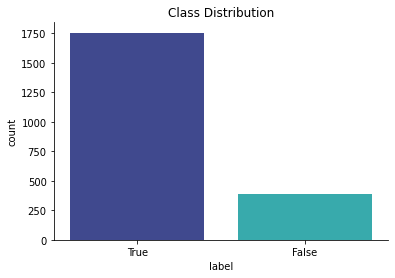

In [ ]:
sns.countplot(x='label', data = NLP4IF_dataset_all, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
NLP4IF_dataset_all['label'].value_counts()

True     1755
False     388
Name: label, dtype: int64

In [ ]:
NLP4IF_dataset_all.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/NLP4IF-all.csv')

# AraCOVID19-MFH

In [ ]:
# Importing the dataset
AraCOVID19_MFH_dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/AraCOVID19-MFH/AraCOVID19-MFH_V1.csv')

In [ ]:
print("Number of data points: ", len(AraCOVID19_MFH_dataset))
AraCOVID19_MFH_dataset.head(10)

Number of data points:  10828


,Tweet_ID,Tweet_Text,Blame_Negative_Demoralizing_Speech,Contains_Fake_Information,Dialect,Factual,Give_Advice,Hate_Speech,News_or_Opinion,Rise_Moral,Talk_About_Cure_or_Vaccine,Worth_Fact-checking
0,1.250190e+18,@4Messi_ الله يلعن كورونا اشتقت اشوف عشب,No,Can't decide,Middle East,Is Not Verifiable,No,Hatfull,Opinion,No,No,Can't decide
1,1.251530e+18,وزارة الصحة​ الروسية لا ترى أي عراقيل أمام است...,No,Maybe,MSA,Is Verifiable,No,Not Hatfull,News,No,Yes,Yes
2,1.324750e+18,وزارة الصحة تكشف عن إرتفاع عدد الإصابات المؤكد...,No,No,MSA,Is Verifiable,No,Not Hatfull,News,No,No,No
3,1.246540e+18,كيفية الوقاية من فيروس كورونا الجديد للوقاية م...,No,No,MSA,Is Verifiable,Yes,Not Hatfull,Opinion,No,No,Yes
4,1.319990e+18,#دولي: وسائل إعلام جزائرية: الرئيس عبد المجيد ...,No,Can't decide,North Africa,Can't decide,No,Not Hatfull,News,No,No,Can't decide
5,1.254030e+18,"""الله يلعن ابو الكورونا اللي صكرت المساجد وحرم...",No,Can't decide,Middle East,Is Not Verifiable,No,Hatfull,Opinion,No,No,Can't decide
6,1.246520e+18,"https://t.co/1RVxpaK1nt"" كيلي"" مصابة بسرطان ا...",No,Maybe,MSA,Is Verifiable,No,Not Hatfull,News,No,No,Maybe
7,1.265570e+18,منظمة الصحة العالمية تدعو لوقف استخدام عقار هي...,No,Can't decide,MSA,Can't decide,No,Not Hatfull,News,No,Yes,Can't decide
8,1.243540e+18,#كورونا #البدون اللهم بشرنا بزوال هذا الوباء و...,No,Can't decide,Middle East,Is Not Verifiable,No,Not Hatfull,Opinion,No,No,Can't decide
9,1.329040e+18,#عاجل.. شركة فايزر الأميركية ترفع فاعلية لقاح...,No,Maybe,MSA,Is Verifiable,No,Not Hatfull,News,No,Yes,Maybe


In [ ]:
AraCOVID19_MFH_dataset=AraCOVID19_MFH_dataset.drop(labels=['Tweet_ID', 'Blame_Negative_Demoralizing_Speech','Dialect','Factual','Give_Advice','Hate_Speech','News_or_Opinion', 'Rise_Moral',	'Talk_About_Cure_or_Vaccine'	,'Worth_Fact-checking'], axis=1)
AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset.rename({'Contains_Fake_Information': 'label'}, axis=1)  # new method
AraCOVID19_MFH_dataset["label"].replace({"No": "True", "Yes": "False"}, inplace=True)

In [ ]:
AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[(AraCOVID19_MFH_dataset.label != 'Maybe') & (AraCOVID19_MFH_dataset.label != 'Can\'t decide')]
AraCOVID19_MFH_dataset.head(5)

,Tweet_Text,label
2,وزارة الصحة تكشف عن إرتفاع عدد الإصابات المؤكد...,True
3,كيفية الوقاية من فيروس كورونا الجديد للوقاية م...,True
14,🔴 ارتفاع عدد الوفيات بكورونا في الجزائر إلى 3...,True
20,متى يجب عليك غسل اليدين؟ #الوقاية_من_كورونا ...,True
26,رسمياً.. #الرئاسة_الجزائرية تؤكد إصابة الرئيس ...,True


Text(0.5, 1.0, 'Class Distribution')

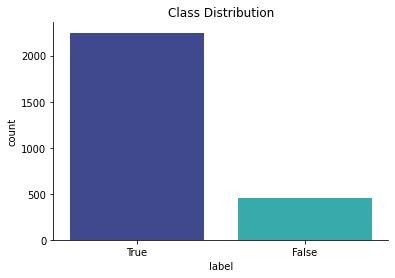

In [ ]:
sns.countplot(x='label', data = AraCOVID19_MFH_dataset, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
AraCOVID19_MFH_dataset['label'].value_counts()

True     2249
False     459
Name: label, dtype: int64

In [ ]:
AraCOVID19_MFH_dataset.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/AraCOVID19_MFH_dataset.csv')

# Combined Datasets

### AraCOVID19-MFH
True     2249</br>
False     459

### NLP4IF-AR
True     1755</br>
False     388

### ARCOV19-Romurs
True     1614</br>
False    1572


We want to merge all datasets into one,</br>
we notice that the number of False datapoints are lower across datasets, thus, we will be using its summation as a baseline for the the size of the combined dataset<br>
False= 1572+459+388 =2419<br>
True=2419/3 = 806+806+807


In [ ]:
##Getting 2149 True points from the datasets
True_AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[AraCOVID19_MFH_dataset.label == 'True'].sample(n = 806)
True_NLP4IF_dataset = NLP4IF_dataset_all[NLP4IF_dataset_all.label == 'True'].sample(n = 806)
True_ArCOV19_dataset= ArCOV19_dataset_unique[ArCOV19_dataset_unique.label	== 'True'].sample(n = 807)

In [ ]:
##Getting 2149 False points from the datasets
False_AraCOVID19_MFH_dataset = AraCOVID19_MFH_dataset[AraCOVID19_MFH_dataset.label == 'False'].sample(n = 459)
False_NLP4IF_dataset = NLP4IF_dataset_all[NLP4IF_dataset_all.label == 'False'].sample(n = 388)
False_ArCOV19_dataset= ArCOV19_dataset_unique[ArCOV19_dataset_unique.label	== 'False'].sample(n = 1572)

In [ ]:
#Merging each one back
AraCOVID19_MFH_frames=[True_AraCOVID19_MFH_dataset,False_AraCOVID19_MFH_dataset]
NLP4IF_dataset_frames=[True_NLP4IF_dataset,False_NLP4IF_dataset]
ArCOV19_dataset_frames=[True_ArCOV19_dataset, False_ArCOV19_dataset]

AraCOVID19_MFH_dataset_filtered = pd.concat(AraCOVID19_MFH_frames).sample(frac=1)
NLP4IF_dataset_filtered = pd.concat(NLP4IF_dataset_frames).sample(frac=1)
ArCOV19_dataset_filtered = pd.concat(ArCOV19_dataset_frames).sample(frac=1)


In [ ]:
AraCOVID19_MFH_dataset_filtered = AraCOVID19_MFH_dataset_filtered.rename({'Tweet_Text': 'tweet_text'}, axis=1)  # new method

AraCOVID19_MFH_dataset_filtered.head()

,tweet_text,label
3956,هلق هيي ممكن تكون من إبدعات اللبناني بس أكيد م...,False
6266,الصين يشوفون اي حيوان ياكلونه الهند يشوفون اي ...,False
10576,هولاء الي سافرو لايران بدون تختيم الجوازات هول...,False
3609,وزير الصحة قال #لا_داعي_للهلع... وصل #فيروس_كو...,False
3756,#عاجل #الصحة: حتى اليوم، لا يوجد علاج مخصص مو...,True


In [ ]:
NLP4IF_dataset_filtered.head()

,tweet_text,label
2187,الرئيس الروسي: لقاح #كورونا فعال ويشكل مناعة م...,True
816,🇨🇳 بعد أن أعلنتها روسيا.. الصين تعلن عن تسجيل ...,True
47,صحة ينبع تدشن خدمة التطعيم ضد فيروس كورونا داخ...,True
326,لقاح اكسفورد ننتظر نتائجه .. عموماً كما يتضح ل...,True
659,شركة ( أسترا زينيكا ) الإنجليزية لصناعة الأدوي...,False


In [ ]:
ArCOV19_dataset_filtered[['tweetText', 'label']] = ArCOV19_dataset_filtered[['label', 'tweetText']]
ArCOV19_dataset_filtered = ArCOV19_dataset_filtered.rename({'tweetText': 'label', 'label':'tweet_text'}, axis=1)  # new method

#ArCOV19_dataset_filtered=df_column_switch(ArCOV19_dataset_filtered, column1, column2)

ArCOV19_dataset_filtered.head()

,tweet_text,label
83,كل 100 عام هناك وباء 👇 1️⃣عام 1720 ضرب مدينة م...,False
2759,قد يكون للثوم نكهة لذيذة، لكنه لا يقي من #فيرو...,True
146,"#كورونا▪️""بعد فيروس كورونا،أسراب من،طائر الغرا...",False
1062,بروفسير صيني يتوصل الي ان استنشاق بخار الماء ا...,False
1608,▪ الغرغرة بماء دافئ وملح يقتل جراثيم اللوزتين ...,False


In [ ]:
#Combine to one dataset
#                       MFH                                 4IF,                 ARC
dataset_all_frames=[AraCOVID19_MFH_dataset_filtered, NLP4IF_dataset_filtered, ArCOV19_dataset_filtered]
dataset_filtered = pd.concat(dataset_all_frames, keys=["MFH", "4IF", "ARC"]).sample(frac=1)
dataset_filtered.reset_index(inplace = True)
dataset_filtered=dataset_filtered.drop(labels='level_1', axis=1)
dataset_filtered = dataset_filtered.rename({'level_0': 'origin'}, axis=1)  # new method

In [ ]:
dataset_filtered.head(10)

,origin,tweet_text,label
0,ARC,#الكورونا الطريقة الصحيحة لاستخدام الكمامات لا...,False
1,MFH,كونا | إصابة أنثى نمر في حديقة حيوان بمدينة (ن...,True
2,ARC,في مشهد مهيب تقشعر له الأبدان. خرج العاملون في...,True
3,4IF,بعد كسر حاجز 10000 أصابه نشطة في قطر ،،، وزارة...,True
4,ARC,الواضح من الأرقام أن #كورونا_الجديد #COVIDー19...,True
5,4IF,بدأت #إندونيسيا الثلاثاء اختبار لقاح صيني ضد ف...,True
6,ARC,منقولة هذا الريس يستحق الحب والاحترام رئيس ك...,False
7,MFH,#وزارة_الصحة_السعودية ١١ ألف شخص غادروا الحجر...,True
8,4IF,أستاذ المناعة وتطوير اللقاحات بمعهد إدوارد جين...,True
9,ARC,زعيم كوريا الشمالية يقول : ان فيروس #كورونا ل...,False


Text(0.5, 1.0, 'Class Distribution')

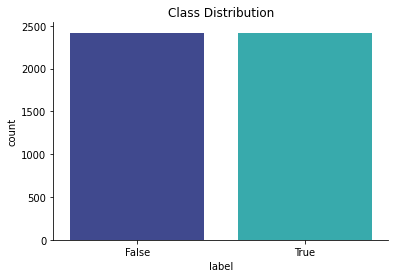

In [ ]:
sns.countplot(x='label', data = dataset_filtered, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
dataset_filtered['label'].value_counts()

False    2419
True     2419
Name: label, dtype: int64

In [ ]:
dataset_filtered.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

NameError: ignored

# Analayzing the Datset

In [ ]:
dataset =pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

In [ ]:
print("Number of data points: ", len(dataset ))
print(dataset['label'].value_counts())
dataset.head()

Number of data points:  4838
False    2419
True     2419
Name: label, dtype: int64


,Unnamed: 0,origin,tweet_text,label
0,0,ARC,#الكورونا الطريقة الصحيحة لاستخدام الكمامات لا...,False
1,1,MFH,كونا | إصابة أنثى نمر في حديقة حيوان بمدينة (ن...,True
2,2,ARC,في مشهد مهيب تقشعر له الأبدان. خرج العاملون في...,True
3,3,4IF,بعد كسر حاجز 10000 أصابه نشطة في قطر ،،، وزارة...,True
4,4,ARC,الواضح من الأرقام أن #كورونا_الجديد #COVIDー19...,True


Text(0.5, 1.0, 'Class Distribution')

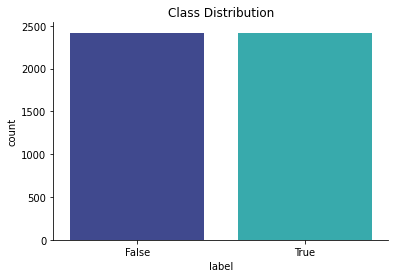

In [ ]:
sns.countplot(x='label', data = dataset, palette = 'mako',
              saturation = 1)
sns.despine()
plt.title('Class Distribution')

In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def preprocess_tweet(tweets):
  tokens = ''
  global emoji_pattern
  for tweet in tweets:
    temp = tweet.strip()
    #temp = re.sub(r'http(\S)+', ' ', temp)
    #temp = re.sub(r'www(\S)+', ' ', temp)
    temp = temp.replace('\n', ' ')
    temp = re.sub(r'[\'\"\#\|\ー)]', '',temp)
    temp = re.sub(r'[\#\-\_]', ' ', temp)
    temp = re.sub(r'[\»\«]', '', temp)
    temp = re.sub(r'[A-Za-z]', '', temp)
    temp = re.sub(r'[^\w\s]', '', temp)
    #temp=emoji_pattern.sub(r'', temp)
    temp= temp.strip()
    temp= temp.rstrip('\.')
    tokens += temp + ' '

  return tokens


In [ ]:
real_tweets = dataset[dataset['label']==True]['tweet_text']
false_tweets = dataset[dataset['label']==False]['tweet_text']
all_tweets = dataset['tweet_text']

In [ ]:
all_tokens = preprocess_tweet(all_tweets)
real_tokens = preprocess_tweet(real_tweets)
false_tokens = preprocess_tweet(false_tweets)

In [ ]:
## Creating a function to generate a wordcloud to see how the words are distributed
img_count = 0
def get_wordcloud(token_set):
  global img_count

  text= arabic_reshaper.reshape(token_set)
  text= get_display(text)
  wordcloud = WordCloud(width = 1200, height = 600, 
              background_color ='white', stopwords = STOPWORDS, font_path='/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/NotoNaskhArabic-Regular.ttf'
              ,min_font_size = 10).generate(text)

  plt.figure(figsize = (12, 6), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0)
  figname = 'wordcloud'+ str(img_count)
  plt.savefig(figname) 
  img_count+=1


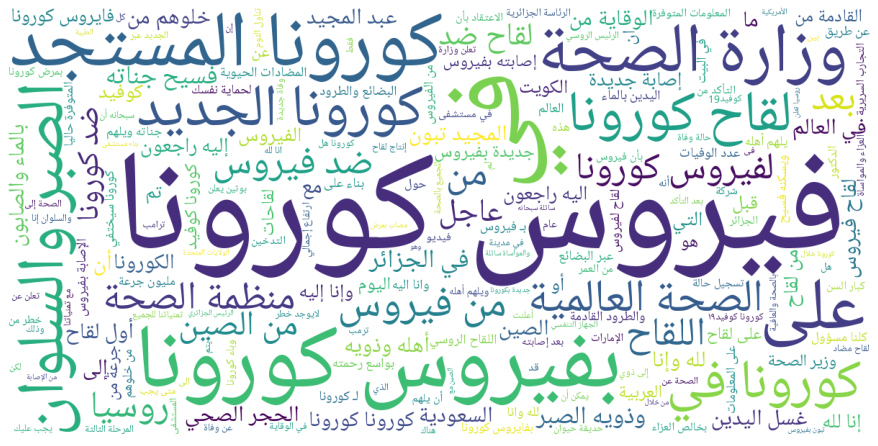

In [ ]:
get_wordcloud(real_tokens)

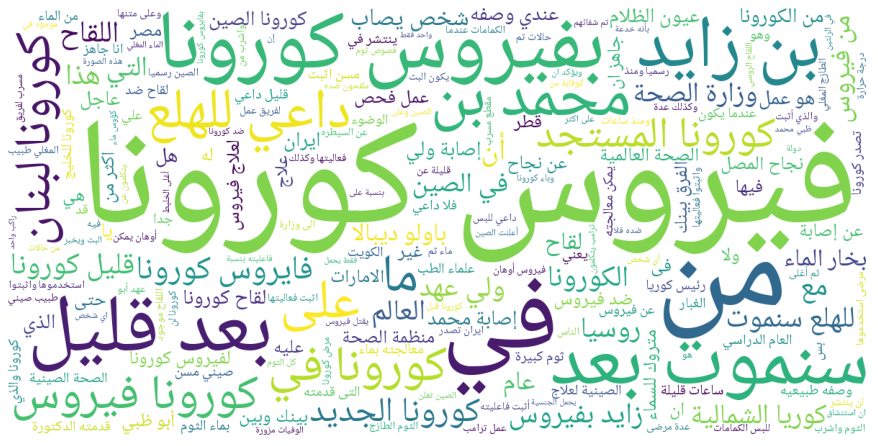

In [ ]:
get_wordcloud(false_tokens)

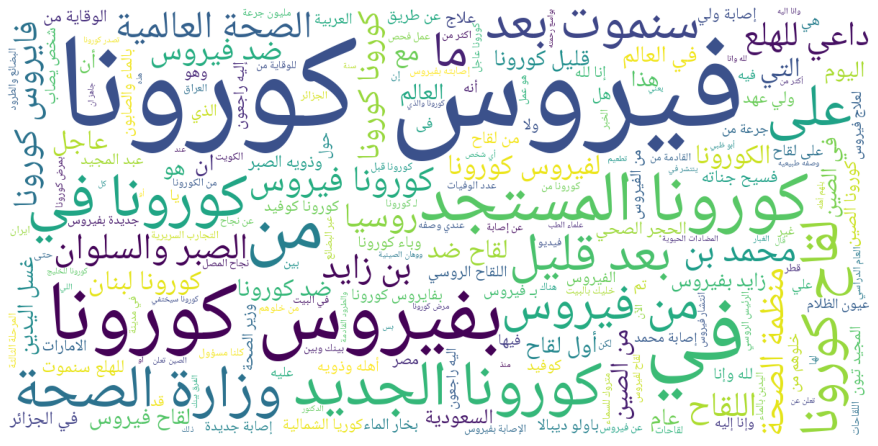

In [ ]:
get_wordcloud(all_tokens)

# Cleaning the Dataset

In [ ]:
!pip install camel-tools


     |████████████████████████████████| 58 kB 2.4 MB/s 
     |████████████████████████████████| 3.8 MB 10.6 MB/s 
     |████████████████████████████████| 418 kB 38.0 MB/s 
     |████████████████████████████████| 596 kB 37.1 MB/s 
     |████████████████████████████████| 6.5 MB 36.0 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Created wheel for camel-tools: filename=camel_tools-1.2.0-py3-none-any.whl size=99048 sha256=2a8df3b89d5b8fb0b900fc519759b7585b1e93455d9e6b79d48c7d1e375816b8
  Stored in directory: /root/.cache/pip/wheels/05/ad/a1/e8aa569c102f0b8b3522ae515b7d0696046e4490c0ff4edb0a
  Created wheel for camel-kenlm: filename=camel_kenlm-2021.12.27-cp37-cp37m-linux_x86_64.whl size=2334097 sha256=11a8b65755d1bdd4baa643ac2467e3e8d0ad9bb4c6e06962a7805feead4f028a
  Stored in directory: /root/.cache/pip/wheels/db/72/74/982f8c435f15b7feaf6dc8a03e212ff34e93f1f2d747059332
Successfully built camel-tools camel-kenlm
  A

In [ ]:
!camel_data light

In [ ]:
!git clone https://github.com/aub-mind/arabert

Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 11.18 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
!pip install py4j
!pip install pyarabic

     |████████████████████████████████| 198 kB 5.3 MB/s 
     |████████████████████████████████| 126 kB 5.2 MB/s 


In [ ]:
!pip install emoji

     |████████████████████████████████| 174 kB 5.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5d4a37de57675dd0b3094f3e6563a0c08e405a228aeedc25999168755fc64237
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor

In [ ]:
full_dataset =pd.read_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset.csv')

In [ ]:
model_name = "aubmindlab/bert-base-arabertv02-twitter"
arabert_prep = ArabertPreprocessor(model_name=model_name, keep_emojis=False, map_hindi_numbers_to_arabic=True )
full_dataset['tweet_text'] = full_dataset['tweet_text'].map(lambda x: arabert_prep.preprocess(x))

'''
text = "أهم الإرشادات وطرق الوقاية الصحية لتجنب فيروس كورونا المستجد #كورونا_الكويت 🦠🇰🇼 https://t.co/fqf8g6xZMR"
print(arabert_prep.preprocess(text))

text = "انا من الشباب إذاً انا لدي مناعه ضد #الكورونا هذا كلام خاطئ يمكن للفيروس أن يصيب كل الأعمار ويمكن أن يضعك بالمستشفي لأسابيع و يمكن ان يقتلك حتي اذا لم تكن تعاني من أي مرض قد تكون الخيارات في اتخاذها هي الفرق بين الحياة والموت حديث دكتور @DrTedos #طلاب_الثانوية_بتتفيروس"
print(arabert_prep.preprocess(text))
text = "🇨🇳🇺🇲| مجلة الجمعية الطبية الأمريكية JAMA .. أظهرت بيانات اختبارات سريرية .. 🔸️أن اللقاح الذي طورته الصين 🔸️يعطل فيروس COVID-19 .. ويعد آمناً ويولد استجابة مناعية 🔸️ولكن يجب اتمام المرحلة الثالثة https://t.co/10hqRorXR5"
print(arabert_prep.preprocess(text))'''

'\ntext = "أهم الإرشادات وطرق الوقاية الصحية لتجنب فيروس كورونا المستجد #كورونا_الكويت 🦠🇰🇼 https://t.co/fqf8g6xZMR"\nprint(arabert_prep.preprocess(text))\n\ntext = "انا من الشباب إذاً انا لدي مناعه ضد #الكورونا هذا كلام خاطئ يمكن للفيروس أن يصيب كل الأعمار ويمكن أن يضعك بالمستشفي لأسابيع و يمكن ان يقتلك حتي اذا لم تكن تعاني من أي مرض قد تكون الخيارات في اتخاذها هي الفرق بين الحياة والموت حديث دكتور @DrTedos #طلاب_الثانوية_بتتفيروس"\nprint(arabert_prep.preprocess(text))\ntext = "🇨🇳🇺🇲| مجلة الجمعية الطبية الأمريكية JAMA .. أظهرت بيانات اختبارات سريرية .. 🔸️أن اللقاح الذي طورته الصين 🔸️يعطل فيروس COVID-19 .. ويعد آمناً ويولد استجابة مناعية 🔸️ولكن يجب اتمام المرحلة الثالثة https://t.co/10hqRorXR5"\nprint(arabert_prep.preprocess(text))'

In [ ]:
full_dataset.sample(50)

,Unnamed: 0,origin,tweet_text,label
3503,3503,ARC,الغرغرة بالماء والملح تقضي علي الفيروس ليس للم...,True
1183,1183,ARC,الرئيس الصيني يزور احدالمساجد ويطلب من ائمة ال...,False
3592,3592,4IF,سند وذخر 14953 متطوع حتى الآن من هل # قطر والم...,True
1006,1006,ARC,فيديو لصدام حسين يتحدث عن فيروس كورونا عندما ه...,False
2742,2742,4IF,احدى طائرات الشحن القطرية القادمة من إيران تحم...,False
4277,4277,ARC,من جهة أخرى ، أوضح السديس أن قرار إغلاق الحرمي...,True
3229,3229,ARC,[مستخدم] ترجمة العنوان ليس لها علاقة بسانشيز ا...,True
4377,4377,4IF,طارق المزرم : وزارة الصحة تتواصل وتتابع مع جمي...,True
4733,4733,ARC,# عاجل # فايروس # كورونا # covid19 # الصين اغل...,True
3407,3407,4IF,رئيس لجنة مواجهة # كورونا يتوقع إنتاج لقاح في ...,True


In [ ]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def preprocess_tweet(tweet):
  temp = tweet.strip()
  temp = re.sub(r'http(\S)+', ' ', temp)
  temp = re.sub(r'www(\S)+', ' ', temp)
  temp = temp.replace('\n', ' ')
  temp = re.sub(r'[\'\"\#\|\ー\*]', '',temp)
  temp = re.sub(r'[\#\-\_]', ' ', temp)
  temp = re.sub(r'[\»\«]', '', temp)
  temp = re.sub(r'(@[A-Za-z0-9]* *[A-Za-z0-9]*)?', "", temp)
  temp = re.sub(r'\. *(\.)+', "\.", temp)
  temp = re.sub(r'\!(\!)+', "\!", temp)
  temp = re.sub(r'\?(\?)+', "\?", temp)
  temp = re.sub(r'\؟(\؟)+', "؟", temp)
  temp = re.sub(r'\\', "", temp)
  #temp = re.sub(r'(🤷‍♂️|⚠️|✔️|✍)', "", temp)
  temp = re.sub(r'\، *(\،)+', "\، ", temp)
  temp = re.sub(r'[^\u0621-\u064A\u0660-\u0669A-Za-z0-9\?\؟\.\،\!\:\;\؛ ]', " ", temp)
  temp = re.sub(r'URL', ' ', temp)
  temp = re.sub(r'٠', '', temp)
  
  #temp = re.sub(r'[^\w\s]', '', temp)
  temp=emoji_pattern.sub(r'', temp)
  temp= temp.strip()
  temp= temp.rstrip('\.')

  return temp

In [ ]:
full_dataset['tweet_text'] = full_dataset['tweet_text'].map(lambda x: preprocess_tweet(str(x)))

In [ ]:
full_dataset=full_dataset.drop(labels='Unnamed: 0', axis=1)

In [ ]:
full_dataset.sample(100)

,origin,tweet_text,label
1492,ARC,شو صحة هاي الخبر؟ م صيبة تحل على الإمارات. إص...,False
4618,ARC,شاهد رحلة الخطوط الاثيوبية قبل قليل قادمة من إ...,False
764,ARC,إصابة رئيس وزراء بريطانيا بوريس جونسون بفيروس ...,True
4785,4IF,أخبار سارة. أعلنت روسيا أن لقاح فيروس كورونا ا...,True
411,ARC,كوريا الشمالية : اعدام أي شخص يصاب بفيروس كورو...,False
...,...,...,...
2260,ARC,أعلنت الصين رسميا ومنذ ساعات قليلة عن نجاح الم...,False
1039,4IF,بالشفا دراسة هولندية: لقاح السل محفز عام للمن...,True
4370,MFH,الفرق بيننا وبين لي معو كورونا ،انو هو عمل فحص...,False
991,MFH,النهاردة تم الإعلان رسميا عن إصابة الرئيس الج...,True


In [ ]:
full_dataset.to_csv('/content/drive/MyDrive/Capstone Project Files CS/Datasets/Processed Datasets/project_dataset_preprocessed.csv')